# PTIT HCM IOT - Water Quality Management

## Data preparation

### Loading data

In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset/processed_dataset_rd.csv')
df.head()

,temperature,water_level,tds_level,env_humidity,pump_in,pump_out,cooler,heater,tds_plants,tds_fishes,mist_sprayer,ventilation
0,26.68,21.65,220.43,64.18,0,0,0,0,1,1,0,0
1,23.75,18.34,177.20,65.26,1,0,0,0,1,0,0,0
2,25.95,21.70,380.24,64.25,0,0,0,0,1,1,0,0
3,33.75,19.86,282.90,62.19,1,0,1,0,1,1,0,0
4,24.59,22.30,309.06,64.00,0,0,0,0,1,1,0,0


### Data visualization

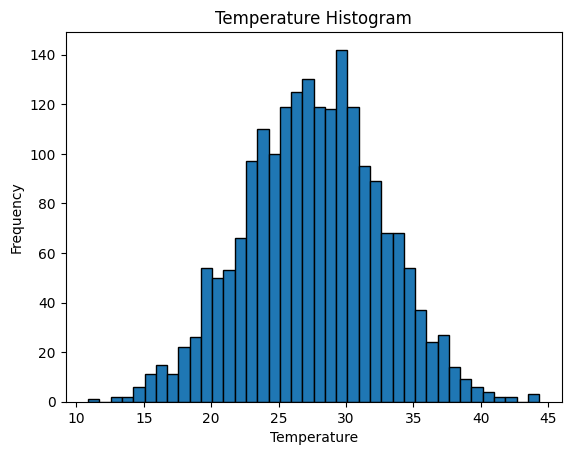

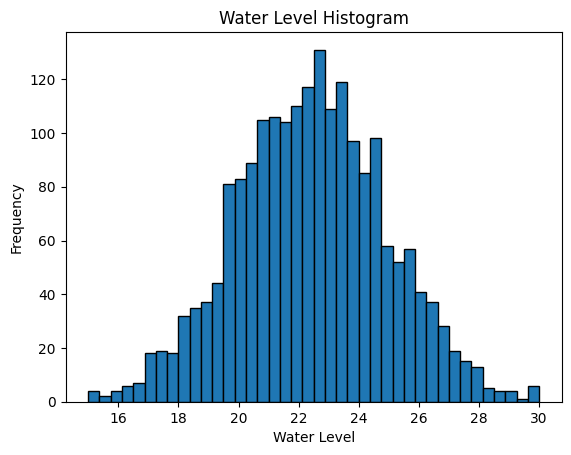

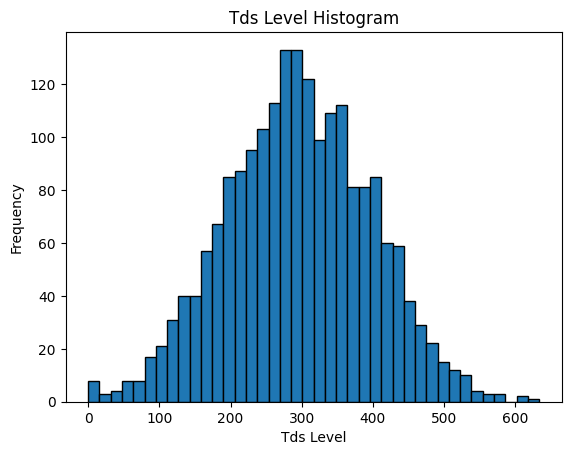

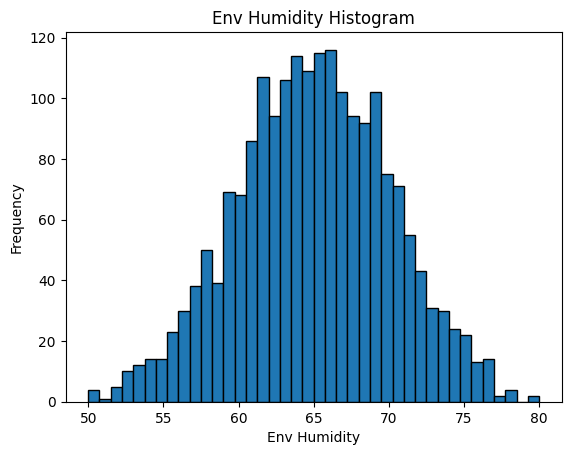

In [12]:
import matplotlib.pyplot as plt
import string

columns_to_show = ['temperature', 'water_level', 'tds_level', 'env_humidity']

for column in columns_to_show:
    formatted_name = string.capwords(column.replace("_", " "))
    
    plt.hist(df[column], bins=40, edgecolor='black')
    plt.title(f'{formatted_name} Histogram')
    plt.xlabel(f'{formatted_name}')
    plt.ylabel('Frequency')
    plt.show()

### Data spliting

In [13]:
from sklearn.model_selection import train_test_split

X = df[['temperature', 'water_level', 'tds_level', 'env_humidity']]
y = df[['pump_in', 'pump_out', 'cooler', 'heater', 'tds_plants', 'tds_fishes', 'mist_sprayer', 'ventilation']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(1600, 4)
(1600, 8)
(400, 4)
(400, 8)


(None, None)

## AI model training

In [14]:
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

best_model_params = {}
best_model_f1_score = 0

### Using BinaryRelevance method

The `BinaryRelevance` method is an approach used in multi-label classification problems, where each instance can belong to multiple classes (labels) simultaneously. It transforms a multi-label problem into multiple independent binary classification problems, one for each label.

How It Works:
- For each label, `Binary Relevance` creates a separate binary classification problem.
- Each classifier predicts whether or not a particular label applies to a given instance, treating each label as independent from the others.
- The final prediction is a combination of all individual binary classifiers’ predictions.

Advantages:
- Simple to implement.
- Works well when the labels are independent of each other.

Limitations:
- Label independence assumption: It assumes that labels are independent, which might not be the case in real-world datasets (some labels might be correlated).
- Requires training multiple classifiers, which can increase computational cost.

In [15]:
from skmultilearn.problem_transform import BinaryRelevance

parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.7, 1.0, 1.3],
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [50, 100, 150],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [2, 3, 5, 8, 9],
        'classifier__weights': ['uniform', 'distance'],
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    },
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1.0],
        'classifier__max_iter': [50, 100, 200],
    }
]

scores = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
clf = GridSearchCV(BinaryRelevance(), parameters, scoring=scores, refit=False)
clf.fit(X_train, y_train)

print('\nAccuracy for each parameter set:')
for i in range(len(clf.cv_results_['params'])):
    for scorer in scores:
        mean_score = clf.cv_results_[f'mean_test_{scorer}'][i]
        print(f'Parameter set {i+1}: {clf.cv_results_["params"][i]} - Mean {scorer}: {mean_score}')
    print('\n')

c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature 


Accuracy for each parameter set:
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean f1_micro: 0.6829808468964573
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean f1_macro: 0.44990916182712437
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean precision_micro: 0.7569547851713543
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean precision_macro: 0.5234085944101052
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean recall_micro: 0.6225833723061067
Parameter set 1: {'classifier': MultinomialNB(), 'classifier__alpha': 0.7} - Mean recall_macro: 0.42050937365271074


Parameter set 2: {'classifier': MultinomialNB(), 'classifier__alpha': 1.0} - Mean f1_micro: 0.6829808468964573
Parameter set 2: {'classifier': MultinomialNB(), 'classifier__alpha': 1.0} - Mean f1_macro: 0.44990916182712437
Parameter set 2: {'classifier': MultinomialNB(), 'c

c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWar

### Display the best parameter and track the best model

In [16]:
best_score_idx = clf.cv_results_['mean_test_f1_micro'].argmax()
best_params = {k.replace('classifier__', ''): v for k, v in clf.cv_results_['params'][best_score_idx].items()}
print(f'Best parameters: {best_params}')

f1_micro_score = clf.cv_results_['mean_test_f1_micro'][best_score_idx]
print('Mean f1_micro score:', f1_micro_score)

if f1_micro_score > best_model_f1_score:
    best_model_params = best_params
    best_model_f1_score = f1_micro_score

Best parameters: {'classifier': RandomForestClassifier(), 'criterion': 'gini', 'n_estimators': 50}
Mean f1_micro score: 0.9989600556062221


### Regenerate the best model

In [17]:
params = {key: value for key, value in best_model_params.items() if key != 'classifier'}
BestClassifier = best_model_params['classifier']
BestClassifier.set_params(**params)

best_model = BinaryRelevance(BestClassifier)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy_value = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print(best_model)
print('Micro F1 score:', best_model_f1_score)
print('Accuracy score:', accuracy_value)
print('Hamming loss:', hamming_loss_value)

BinaryRelevance(classifier=RandomForestClassifier(n_estimators=50),
                require_dense=[True, True])
Micro F1 score: 0.9989600556062221
Accuracy score: 0.9975
Hamming loss: 0.0003125


c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\TEMP.DESKTOP-NGOONGQ.001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

### Model exportation using Joblib

In [20]:
import joblib

joblib.dump(best_model, 'iot_ai_model_rd2.pkl')

['iot_ai_model.pkl']